# Project: Board games ranking

In [2]:
import pandas as pd

# Load the csv file into a DataFrame
file_path = "/Users/siibidi/Downloads/archive/2022-01-08.csv"
data_df = pd.read_csv("/Users/siibidi/Downloads/archive/2022-01-08.csv")

## Exploring and analysing data

First of all, I uploaded the first data frame for understanding which types of data and columns I have. 

In [3]:
print(data_df.head())
print(data_df.info())

   Unnamed: 0     ID         Name  Year  Rank  Average  Bayes average  \
0         105  30549     Pandemic  2008   106     7.59          7.487   
1         189    822  Carcassonne  2000   190     7.42          7.309   
2         428     13        Catan  1995   429     7.14          6.970   
3          72  68448    7 Wonders  2010    73     7.74          7.634   
4         103  36218     Dominion  2008   104     7.61          7.499   

   Users rated                         URL  \
0       108975   /boardgame/30549/pandemic   
1       108738  /boardgame/822/carcassonne   
2       108024         /boardgame/13/catan   
3        89982  /boardgame/68448/7-wonders   
4        81561   /boardgame/36218/dominion   

                                           Thumbnail  
0  https://cf.geekdo-images.com/S3ybV1LAp-8SnHIXL...  
1  https://cf.geekdo-images.com/okM0dq_bEXnbyQTOv...  
2  https://cf.geekdo-images.com/W3Bsga_uLP9kO91gZ...  
3  https://cf.geekdo-images.com/RvFVTEpnbb4NM7k0I...  
4  https:

The displayed data indicates that the "Thumbnail" column contains non-null values, which should be removed for better data clarity and consistency. Additionally, the dataset is quite large, so it is necessary to filter it by selecting only the games released between 2010 and 2023. This approach not only reduces the dataset size but also helps minimize potential bias in the "Year" column, as it excludes games with unrealistic release years, such as those set after 2024.

In [4]:
import numpy as np


data_df['Thumbnail'].replace(['', 'None', 'N/A'], np.nan, inplace=True)

df_cleaned = data_df.dropna(subset=['Thumbnail'])

print(df_cleaned.shape)
print(df_cleaned.isna().sum())

(21825, 10)
Unnamed: 0       0
ID               0
Name             0
Year             0
Rank             0
Average          0
Bayes average    0
Users rated      0
URL              0
Thumbnail        0
dtype: int64


After ensuring that the dataset is properly prepared, special attention should be given to the "Year" column, as it plays a crucial role in creating rankings. Some games have unrealistic release years, such as dates before **1000** or after **2024**, which is why a filter was applied to focus on a specific and realistic date range. 

To provide a clearer understanding, a plot will illustrate the number of games released each year within the selected range of **2010-2023**.

## Plot: Number of games released (2010-2023).

Games released in each year: Year
2010     700
2011     745
2012     833
2013     872
2014    1011
2015    1154
2016    1301
2017    1335
2018    1333
2019    1269
2020     906
2021     686
2022     117
2023       2
dtype: int64


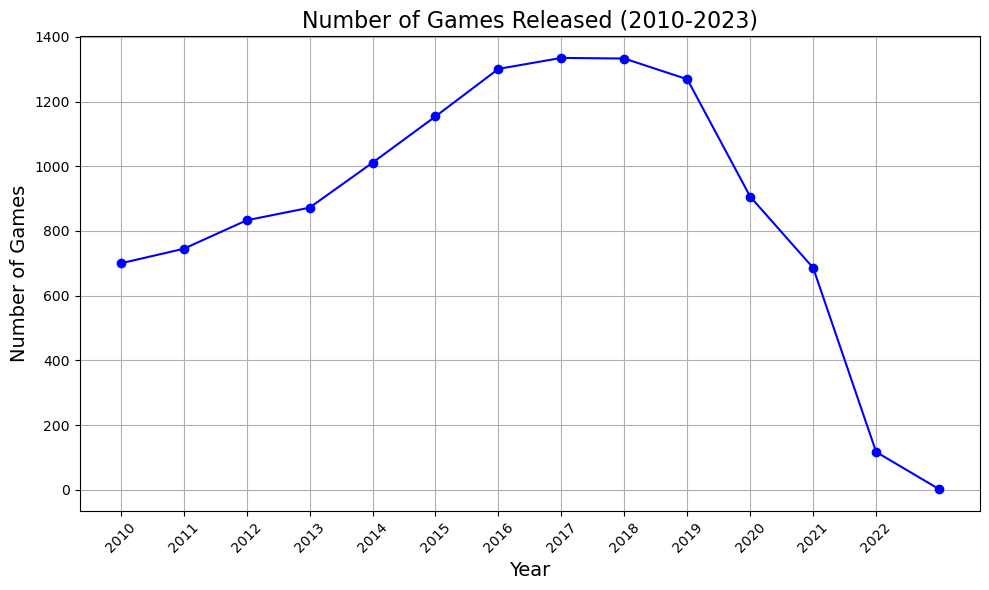

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

filtered_data_df = data_df[(data_df["Year"] >= 2010) & (data_df["Year"] <= 2023)]

games_per_year = filtered_data_df.groupby('Year').size()
print(f"Games released in each year: {games_per_year}")

#Plot games per year
games_per_year = filtered_data_df.groupby('Year').size()

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(games_per_year.index, games_per_year.values, marker='o', linestyle='-', color='b')

# Add labels and title
plt.title('Number of Games Released (2010-2023)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Games', fontsize=14)
plt.grid(True)
plt.xticks(range(2010, 2023), rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

The graph reveals that the majority of games were released between **2012 and 2020**, making this range the most suitable for evaluation. The data also highlights a peak in game releases during the period **2016 to 2019**, which represents the height of activity in this timeframe.

## Observe the initial ranking

The BoardGameGeek (BGG) website determines its ranking based on the "Geek Rating", which appears to be influenced by the "Bayes average" column in the dataset. 

While the website likely uses real-time data updates, I present the ranking generated from the given dataset, specifically using the "Bayes average" column. I found it important to examine both the top and bottom of this ranking for comparison. 

The results show that most games align with the website’s rankings, with the exception of **Ark Nova** and **Dune Imperium**. These games, released after 2020, may not have been weighted as highly in the dataset as they are on the website. 

For the bottom of the ranking, the results generally match the original, except for **Sheep in Disguise**, which is excluded due to having a "Bayes average" of 0.0, making it an outlier in this context.

In [102]:
# Rank the games
data_df["Rank"] = data_df["Bayes average"].rank(ascending=False)
data_df = data_df.sort_values("Rank")

# Display the top 10 games with relevant columns
print(data_df[['Name', 'Bayes average', 'Rank']].head(10))

print(data_df[['Name', 'Bayes average', 'Rank']].tail(6))

                                              Name  Bayes average  Rank
26                                      Gloomhaven          8.511   1.0
28                       Pandemic Legacy: Season 1          8.442   2.0
98                               Brass: Birmingham          8.418   3.0
7                                Terraforming Mars          8.274   4.0
199              Twilight Imperium: Fourth Edition          8.262   5.0
201                   Gloomhaven: Jaws of the Lion          8.260   6.0
148                                   Gaia Project          8.175   7.0
97                            Star Wars: Rebellion          8.172   8.0
96   Through the Ages: A New Story of Civilization          8.150   9.0
209                War of the Ring: Second Edition          8.136  10.0
                     Name  Bayes average     Rank
2227                  War          4.014  21826.0
1496                Bingo          3.971  21827.0
846            Candy Land          3.801  21828.0
880    C

## # The challenge of the project and a new strategy.


After cleaning and exploring the dataset, the key challenge of this project lies in defining metrics and strategies for ranking board games effectively. The central issue is ensuring that rankings account for both the quality of a game (reflected by average ratings) and the reliability of those ratings (influenced by the number of votes).

For instance, a game with a high average rating but very few votes may not be as trustworthy as a game with a slightly lower average but thousands of votes. Similarly, a highly-rated game with minimal votes may unfairly rank higher than widely-voted games with average or lower scores. The challenge is to prioritize these factors appropriately, striking a balance between rating quality and popularity.

To address this, I propose two strategies for ranking:

Fair Ranking (Weighted Score):
This approach emphasizes creating a weighted score that reflects both the game’s rating and its reliability. Calculations like Exponential Weight Decay and other game-level statistics are used to ensure that games with few votes are adjusted downwards, creating a more balanced and fair ranking.

Popularity-Adjusted Ranking:
In addition to the above, this strategy incorporates a popularity factor and introduces an alpha variable to prioritize games based on a combination of weighted score and popularity. This ensures that games with significant player engagement (many votes) are not overlooked, even if their average ratings are moderate.

Before implementing proposed strategies I want to calculate "Bayesian Score" instead of the "Bayes averege". It will help me to eliminate those games with very low votes and outliers. Votes can be up to 45000 per game, therefore I set the min votes to cosnider 1000. 

In [93]:
# Example Bayesian formula
m = 1000# Minimum votes to consider
C = data_df["Average"].mean()  # Global average rating

data_df["Bayesian score"] = (data_df["Users rated"] * data_df["Average"] + m * C) /(
    data_df["Users rated"] + m
)

# Rank the games
data_df["Rank"] = data_df["Bayesian score"].rank(ascending=False)
data_df = data_df.sort_values("Rank")

# Display the top 10 games with relevant columns
print(data_df[['Name', 'Bayesian score', 'Rank']].head(10))

print(data_df[['Name', 'Bayesian score', 'Rank']].tail(5))



                                  Name  Bayesian score  Rank
26                          Gloomhaven        8.692423   1.0
98                   Brass: Birmingham        8.575306   2.0
199  Twilight Imperium: Fourth Edition        8.547075   3.0
201       Gloomhaven: Jaws of the Lion        8.546235   4.0
28           Pandemic Legacy: Season 1        8.542802   5.0
7                    Terraforming Mars        8.393369   6.0
209    War of the Ring: Second Edition        8.383134   7.0
148                       Gaia Project        8.368208   8.0
457             Kingdom Death: Monster        8.368076   9.0
97                Star Wars: Rebellion        8.344658  10.0
                    Name  Bayesian score     Rank
2227                 War        4.001927  21827.0
1496               Bingo        3.957684  21828.0
846           Candy Land        3.797976  21829.0
880   Chutes and Ladders        3.574461  21830.0
1029         Tic-Tac-Toe        3.537908  21831.0


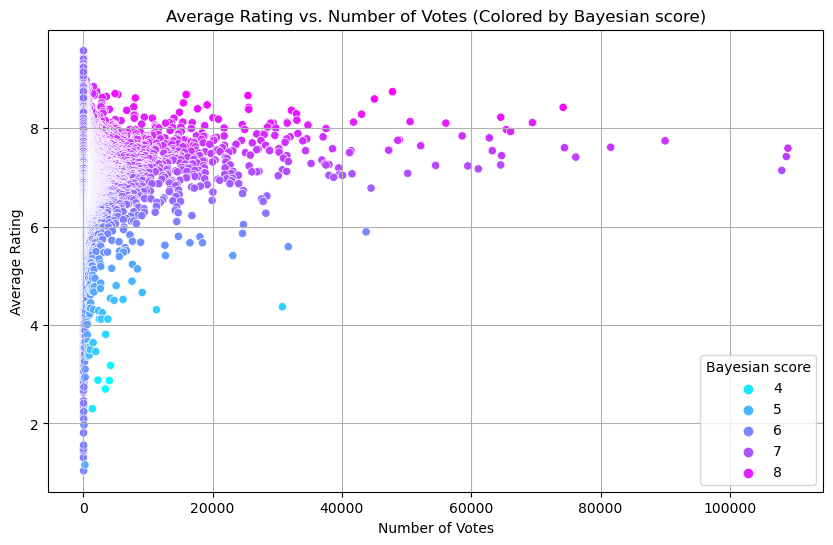

In [95]:
# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_df, 
                x='Users rated', 
                y='Average', 
                hue='Bayesian score',  
                palette='cool', 
                sizes=(20, 200))
plt.title('Average Rating vs. Number of Votes (Colored by Bayesian score)')
plt.xlabel('Number of Votes')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

This scatter plot visualizes the relationship between the average rating of board games and the number of votes they received, with the points color-coded by their Bayesian score. The majority of games cluster around lower vote counts (on the left), showing that many games have fewer ratings. However, games with higher vote counts tend to have higher average ratings, as seen in the dense grouping of purple points in the top-right region. The color gradient indicates that games with higher Bayesian scores (darker purple) are generally more popular and consistently rated. 

## This plot illustrates the importance of defining prioritised metrics.

In [103]:
from tabulate import tabulate

# Ensure the data is sorted by Bayesian Score
top_10_games = data_df.sort_values(by='Bayesian score', ascending=False).head(10)

# Tabulate only the top 10 games
table = tabulate(top_10_games[['Name', 'Bayesian score', 'Average', 'Users rated']], 
                 headers='keys', 
                 tablefmt='grid')
print(table)


+-----+-----------------------------------+------------------+-----------+---------------+
|     | Name                              |   Bayesian score |   Average |   Users rated |
+=====+===================================+==================+===========+===============+
|  26 | Gloomhaven                        |          8.69242 |      8.74 |         47827 |
+-----+-----------------------------------+------------------+-----------+---------------+
|  98 | Brass: Birmingham                 |          8.57531 |      8.66 |         25484 |
+-----+-----------------------------------+------------------+-----------+---------------+
| 199 | Twilight Imperium: Fourth Edition |          8.54708 |      8.68 |         16025 |
+-----+-----------------------------------+------------------+-----------+---------------+
| 201 | Gloomhaven: Jaws of the Lion      |          8.54623 |      8.68 |         15918 |
+-----+-----------------------------------+------------------+-----------+---------------+

## First strategy: quality prioritized

Exponential Weight Decay: This method ensures that games with fewer votes don’t disproportionately influence rankings, as their ratings are less reliable. It highlights games that are both highly-rated and widely-rated.

Average (mean rating for the game): Reflects the central tendency of user opinions.

Users rated (number of ratings): Reflects the popularity and reliability of the rating.

Bayes average (provided): Already accounts for vote count and average, making it a strong base metric.

In [105]:
# Step 1: Calculate variability proxy (1 / Users rated)
data_df["Variability"] = 1 / data_df["Users rated"]

# Step 2: Apply Exponential Weight Decay formula
alpha = 1  # Decay factor
data_df["Exponential Score"] = data_df["Bayesian score"] * np.exp(-alpha * data_df["Variability"])

# Step 3: Sort by Exponential Score and assign new rank
data_df = data_df.sort_values(by="Exponential Score", ascending=False)
data_df["Exponential Rank"] = range(1, len(data_df) + 1)

# Display the ranked DataFrame
print(data_df[["Name", "Bayesian score", "Users rated", "Exponential Score", "Exponential Rank"]])

                                   Name  Bayesian score  Users rated  \
26                           Gloomhaven        8.692423        47827   
98                    Brass: Birmingham        8.575306        25484   
199   Twilight Imperium: Fourth Edition        8.547075        16025   
201        Gloomhaven: Jaws of the Lion        8.546235        15918   
28            Pandemic Legacy: Season 1        8.542802        45041   
...                                 ...             ...          ...   
2227                                War        4.001927         1419   
1496                              Bingo        3.957684         2282   
846                          Candy Land        3.797976         4238   
880                  Chutes and Ladders        3.574461         4035   
1029                        Tic-Tac-Toe        3.537908         3436   

      Exponential Score  Exponential Rank  
26             8.692241                 1  
98             8.574969                 2  
199

## Uploading a second dataset.

For better understanding the ranking I decided to upload second data set with scores from users and merge together with the first data set that was already filtered. 

In [23]:

ratings_df = pd.read_csv("/Users/siibidi/Downloads/archive/bgg-19m-reviews.csv")  # Second dataset

# Merging on the common ID column
merged_df = pd.merge(ratings_df, filtered_data_df, on="ID")


## Calculation of  Game-Level Statistics

Adding the second dataset, which contains user, rating, comment, ID, and name, can significantly improve the implementation of the Exponential Weight Decay strategy because I have access to individual user ratings. This provides more precise information about variability and consistency, which can refine the ranking approach.

1) It is possible to caclulate the standart deviation instead of approximate variability (1 / Users rated).
2) Better insights about distribution of each game. High average and extreme ratings can be penalized. 




In [25]:
# Group by game ID to calculate statistics
game_stats = merged_df.groupby("ID").agg({
    "rating": ["mean", "std", "count"],  # Mean rating, standard deviation, number of ratings
}).reset_index()

# Flatten the column names
game_stats.columns = ["ID", "Average", "StdDev", "Users rated"]

# Merge statistics back with the original games dataset
games_df = pd.merge(filtered_data_df, game_stats, on="ID")

print(games_df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12264 entries, 0 to 12263
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     12264 non-null  int64  
 1   ID             12264 non-null  int64  
 2   Name           12264 non-null  object 
 3   Year           12264 non-null  int64  
 4   Rank           12264 non-null  int64  
 5   Average_x      12264 non-null  float64
 6   Bayes average  12264 non-null  float64
 7   Users rated_x  12264 non-null  int64  
 8   URL            12264 non-null  object 
 9   Thumbnail      12260 non-null  object 
 10  Average_y      12264 non-null  float64
 11  StdDev         12264 non-null  float64
 12  Users rated_y  12264 non-null  int64  
dtypes: float64(4), int64(6), object(3)
memory usage: 1.3+ MB
None


In [37]:
# Example Bayesian formula
m = 1000  # Minimum votes to consider
C = games_df["Average_x"].mean()  # Global average rating

# Calculate Bayesian score with exponential weight decay
alpha = 1  # Decay factor
games_df["Bayesian score"] = (games_df["Users rated_x"] * games_df["Average_x"] + m * C) / (
    games_df["Users rated_x"] + m
)
games_df["Exponential Score"] = games_df["Bayesian score"] * np.exp(-alpha * games_df["StdDev"])

# Sort by Exponential Score
games_df = games_df.sort_values(by="Exponential Score", ascending=False)

# Add new ranks
games_df["Exponential Rank"] = range(1, len(games_df) + 1)




In [98]:
# Ensure the data is sorted by Bayesian Score
top_10_games = games_df.sort_values(by='Rank', ascending=True).head(10)

# Tabulate only the top 10 games
table = tabulate(top_10_games[['Name', 'Exponential Rank', 'Rank', 'Average_x', 'Users rated_x']], 
                 headers='keys', 
                 tablefmt='grid')
print(table)


+-----+-----------------------------------------------+--------------------+--------+-------------+-----------------+
|     | Name                                          |   Exponential Rank |   Rank |   Average_x |   Users rated_x |
+=====+===============================================+====================+========+=============+=================+
|  13 | Gloomhaven                                    |               4821 |      1 |        8.74 |           47827 |
+-----+-----------------------------------------------+--------------------+--------+-------------+-----------------+
|  14 | Pandemic Legacy: Season 1                     |               3674 |      2 |        8.59 |           45041 |
+-----+-----------------------------------------------+--------------------+--------+-------------+-----------------+
|  57 | Brass: Birmingham                             |                154 |      3 |        8.66 |           25484 |
+-----+-----------------------------------------------+-

In [77]:

# Ensure the data is sorted by New Bayesian Rank - Exponential
top_10_games_new = games_df.sort_values(by='Exponential Rank', ascending=True).head(10)

# Tabulate only the top 10 games
table = tabulate(top_10_games_new[['Name', 'Exponential Rank', 'Rank', 'Average_y', 'Users rated_y', 'Bayesian score']], 
                 headers='keys', 
                 tablefmt='grid')
print(table)

+-------+--------------------------------+--------------------+--------+-------------+-----------------+------------------+
|       | Name                           |   Exponential Rank |   Rank |   Average_y |   Users rated_y |   Bayesian score |
+=======+================================+====================+========+=============+=================+==================+
|  8149 | Oneupmanship: Mine's Bigger    |                  1 |  21704 |     1.04133 |              75 |          6.31061 |
+-------+--------------------------------+--------------------+--------+-------------+-----------------+------------------+
| 10715 | Malhya: Lands of Legends       |                  2 |  13629 |     9.56829 |              41 |          6.81871 |
+-------+--------------------------------+--------------------+--------+-------------+-----------------+------------------+
| 11562 | The Battle for Ramadi          |                  3 |  13444 |     7.02286 |              35 |          6.71623 |
+-------

With the additional dataset:

1) Standard Deviation Refines Rankings:
The use of standard deviation (StdDev) allows the ranking to penalize games with highly inconsistent ratings more effectively.
For example, a game with an average rating of 9.0 but a high StdDev of 2.0 would rank lower than a game with a similar average and a low StdDev of 0.5.

2) Improved Handling of Edge Cases:
Games with very few ratings but a high average (ex. "10" from 5 users) are heavily penalized due to their high standard deviation or low Users rated.

/var/folders/dj/1vxtshk90sgg7bzm5dw5_cf80000gn/T/ipykernel_87225/3245268450.py:27: UserWarning: Glyph 30446 (\N{CJK UNIFIED IDEOGRAPH-76EE}) missing from current font.
  plt.tight_layout()
/var/folders/dj/1vxtshk90sgg7bzm5dw5_cf80000gn/T/ipykernel_87225/3245268450.py:27: UserWarning: Glyph 25731 (\N{CJK UNIFIED IDEOGRAPH-6483}) missing from current font.
  plt.tight_layout()
/var/folders/dj/1vxtshk90sgg7bzm5dw5_cf80000gn/T/ipykernel_87225/3245268450.py:27: UserWarning: Glyph 32773 (\N{CJK UNIFIED IDEOGRAPH-8005}) missing from current font.
  plt.tight_layout()
/var/folders/dj/1vxtshk90sgg7bzm5dw5_cf80000gn/T/ipykernel_87225/3245268450.py:27: UserWarning: Glyph 12383 (\N{HIRAGANA LETTER TA}) missing from current font.
  plt.tight_layout()
/var/folders/dj/1vxtshk90sgg7bzm5dw5_cf80000gn/T/ipykernel_87225/3245268450.py:27: UserWarning: Glyph 12385 (\N{HIRAGANA LETTER TI}) missing from current font.
  plt.tight_layout()
/var/folders/dj/1vxtshk90sgg7bzm5dw5_cf80000gn/T/ipykernel_87225/324526

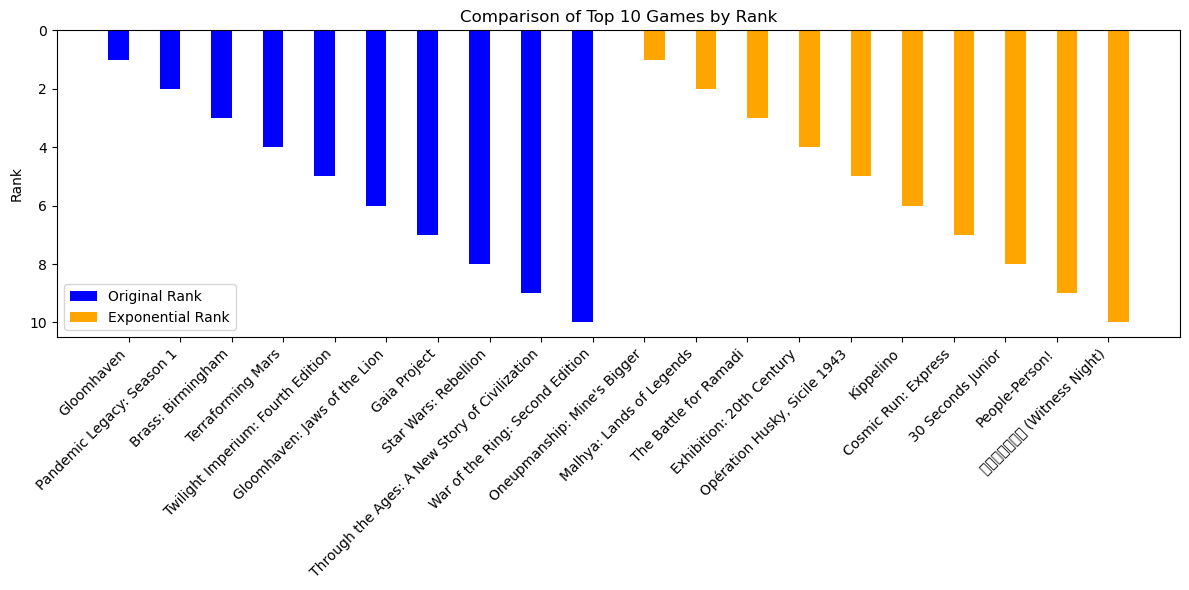

In [99]:

# Get the top 10 games for both rankings
top_10_original = games_df.nsmallest(10, "Rank")
top_10_exponential = games_df.nsmallest(10, "Exponential Rank")

# Combine the two rankings for comparison
comparison_df = top_10_original[["Name", "Rank"]].merge(
    top_10_exponential[["Name", "Exponential Rank"]],
    on="Name",
    how="outer"
)

# Bar chart
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(comparison_df))  # x-axis positions

bar_width = 0.4
ax.bar(x - bar_width / 2, comparison_df["Rank"], width=bar_width, label="Original Rank", color="blue")
ax.bar(x + bar_width / 2, comparison_df["Exponential Rank"], width=bar_width, label="Exponential Rank", color="orange")

ax.set_xticks(x)
ax.set_xticklabels(comparison_df["Name"], rotation=45, ha="right")
ax.set_title("Comparison of Top 10 Games by Rank")
ax.set_ylabel("Rank")
ax.invert_yaxis()  # Lower ranks are better
ax.legend()

plt.tight_layout()
plt.show()


Key observations:

1) The original rank highlights games like Gloomhaven, Pandemic Legacy: Season 1, and Brass: Birmingham as top-ranked based on their existing metrics.

2) The exponential rank, derived from the new Bayesian calculation and user score data, highlights an entirely different set of games, such as Kippelino, Cosmic Run: Express, and 30 Seconds Junior, which were not part of the top 10 in the original ranking.

3) This difference suggests that the inclusion of user-level statistics and the new Bayesian approach places greater emphasis on factors like the distribution and reliability of scores rather than just the average ratings or total votes.

4) The disparity between the two rankings reflects how the new method adjusts rankings to favor games with consistent and well-distributed feedback, likely addressing bias in the original methodology.

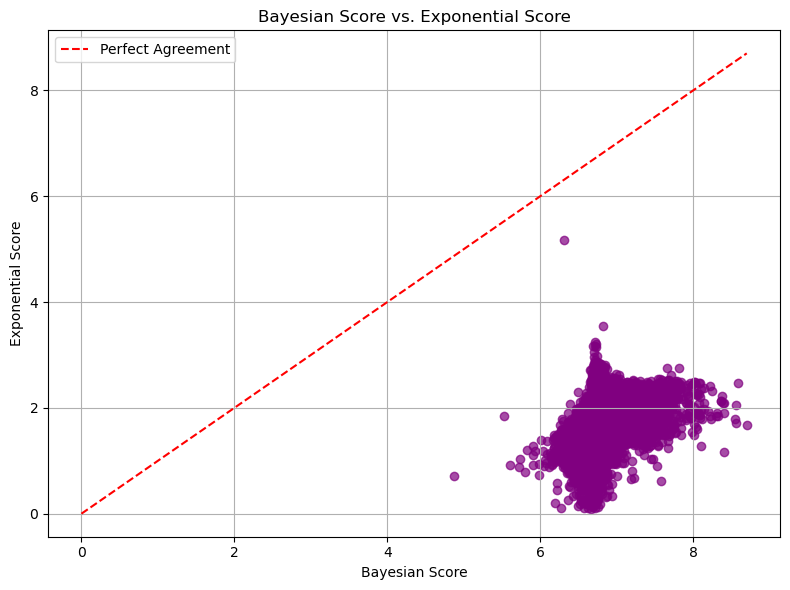

In [79]:
plt.figure(figsize=(8, 6))
plt.scatter(games_df["Bayesian score"], games_df["Exponential Score"], alpha=0.7, color="purple")
plt.title("Bayesian Score vs. Exponential Score")
plt.xlabel("Bayesian Score")
plt.ylabel("Exponential Score")
plt.grid(True)

# Add a diagonal line for comparison
max_score = max(games_df["Bayesian score"].max(), games_df["Exponential Score"].max())
plt.plot([0, max_score], [0, max_score], "r--", label="Perfect Agreement")
plt.legend()
plt.tight_layout()
plt.show()


This scatter plot compares the Bayesian score of board games (x-axis) with their Exponential score (y-axis), overlaying a red dashed line representing perfect agreement between the two scores.

Observations:
1) Deviation from the red line:
Most points fall below the red line, indicating that the Exponential score is generally lower than the Bayesian score for most games.
This suggests that the exponential scoring system applies stricter or more penalizing criteria than the Bayesian method.

2) Clustered distribution:
A dense cluster is visible in the range of Bayesian scores between 5 and 8, with corresponding exponential scores between 1 and 4. This reflects that the majority of games score within this middle range under both systems.

3) Outliers:
A few points deviate significantly, particularly games with a higher Bayesian score (>6) but much lower Exponential scores. These may represent cases where the exponential formula down-weights scores due to factors like fewer votes or inconsistencies in ratings.

4) Interpretation:
The plot reveals that the Exponential scoring system produces a more conservative evaluation of games, prioritizing statistical adjustments over raw scores.
It also highlights discrepancies, where games highly rated by the Bayesian approach may not align with the exponential ranking, emphasizing the differences in methodology.

## Rank Difference

In [100]:
# Assuming 'Rank' is the original rank and 'Exponential Rank' is the new rank from your strategy

# Calculate the difference between the original rank and the new rank
games_df["Rank Difference"] = games_df["Rank"] - games_df["Exponential Rank"]

# Optional: Sort the data by the absolute value of the rank difference to highlight the biggest changes
games_df = games_df.sort_values(by="Rank", key=abs, ascending=True)

# Display the top 10 games with the largest rank differences
highlighted_df = games_df[["Name", "Rank", "Exponential Rank", "Rank Difference"]].head(10)

# Use tabulate to print the table
print(tabulate(highlighted_df, headers="keys", tablefmt="grid"))


+-----+-----------------------------------------------+--------+--------------------+-------------------+
|     | Name                                          |   Rank |   Exponential Rank |   Rank Difference |
+=====+===============================================+========+====================+===================+
|  13 | Gloomhaven                                    |      1 |               4821 |             -4820 |
+-----+-----------------------------------------------+--------+--------------------+-------------------+
|  14 | Pandemic Legacy: Season 1                     |      2 |               3674 |             -3672 |
+-----+-----------------------------------------------+--------+--------------------+-------------------+
|  57 | Brass: Birmingham                             |      3 |                154 |              -151 |
+-----+-----------------------------------------------+--------+--------------------+-------------------+
|   2 | Terraforming Mars                     

This table allows us to see difference between rank and exponential rank. Highlighting how top 10 games have different ranking in the updated version.

## Second strategy: popularity factor.

I wanted to consider popularity factor becasue the Rank difference seems to be significant for original top 10 games ranking. 



In [101]:
# Set alpha to balance quality and popularity
alpha = 0.3  # Example: 30% weight to popularity

# Calculate popularity score
max_users_rated = data_df["Users rated"].max()
data_df["Popularity Score"] = np.log1p(data_df["Users rated"]) / np.log1p(max_users_rated)

# Calculate Weighted Score
data_df["Weighted Score"] = (
    (1 - alpha) * data_df["Bayesian score"] +
    alpha * data_df["Popularity Score"]
)

# Sort the games by the new Weighted Score
data_df = data_df.sort_values(by="Weighted Score", ascending=False)

# Display the top 10 games
top_10_weighted = data_df[["Name", "Weighted Score", "Bayesian score", "Users rated", "Rank"]].head(10)
print(top_10_weighted)


                                  Name  Weighted Score  Bayesian score  \
26                          Gloomhaven        6.363396        8.692423   
98                   Brass: Birmingham        6.265132        8.575306   
28           Pandemic Legacy: Season 1        6.257109        8.542802   
199  Twilight Imperium: Fourth Edition        6.233373        8.547075   
201       Gloomhaven: Jaws of the Lion        6.232611        8.546235   
7                    Terraforming Mars        6.165423        8.393369   
209    War of the Ring: Second Edition        6.117749        8.383134   
148                       Gaia Project        6.112799        8.368208   
97                Star Wars: Rebellion        6.103782        8.344658   
457             Kingdom Death: Monster        6.090316        8.368076   

     Users rated  Rank  
26         47827   1.0  
98         25484   2.0  
28         45041   5.0  
199        16025   3.0  
201        15918   4.0  
7          74216   6.0  
209       

In [85]:

# Set alpha to balance quality and popularity
alpha = 0.3  # Example: 30% weight to popularity

# Calculate popularity score
max_users_rated2 = games_df["Users rated_y"].max()
games_df["Popularity Score"] = np.log1p(games_df["Users rated_y"]) / np.log1p(max_users_rated)

# Calculate Weighted Score
games_df["Weighted Score2"] = (
    (1 - alpha) * data_df["Bayesian score"] +
    alpha * data_df["Popularity Score"]
)

# Sort the games by the new Weighted Score
games_df = games_df.sort_values(by="Weighted Score2", ascending=False)

# Display the top 10 games
top_10_weighted2 = games_df[["Name", "Weighted Score2", "Bayesian score", "Users rated_y"]].head(10)
print(top_10_weighted2)


                          Name  Weighted Score2  Bayesian score  Users rated_y
26                   Mysterium         6.363396        7.264159          35312
98              Dixit: Odyssey         6.265132        7.401306          18012
28                 Five Tribes         6.257109        7.749809          34645
199              The Gallerist         6.233373        7.948239          11141
201      The Fox in the Forest         6.232611        7.158406          10932
7                King of Tokyo         6.165423        7.162527          61203
209  Summoner Wars: Master Set         6.117749        7.431360          10577
148   Letters from Whitechapel         6.112799        7.336236          14419
97    Raiders of the North Sea         6.103782        7.714903          18359
457        Love Letter Premium         6.090316        7.330431           4833


Here we can see that these games are balanced due to a Weighted Score. This ranking would be able to relive games that worth attention of users, but they do not show the high top games if popularity is a significant criteria. 

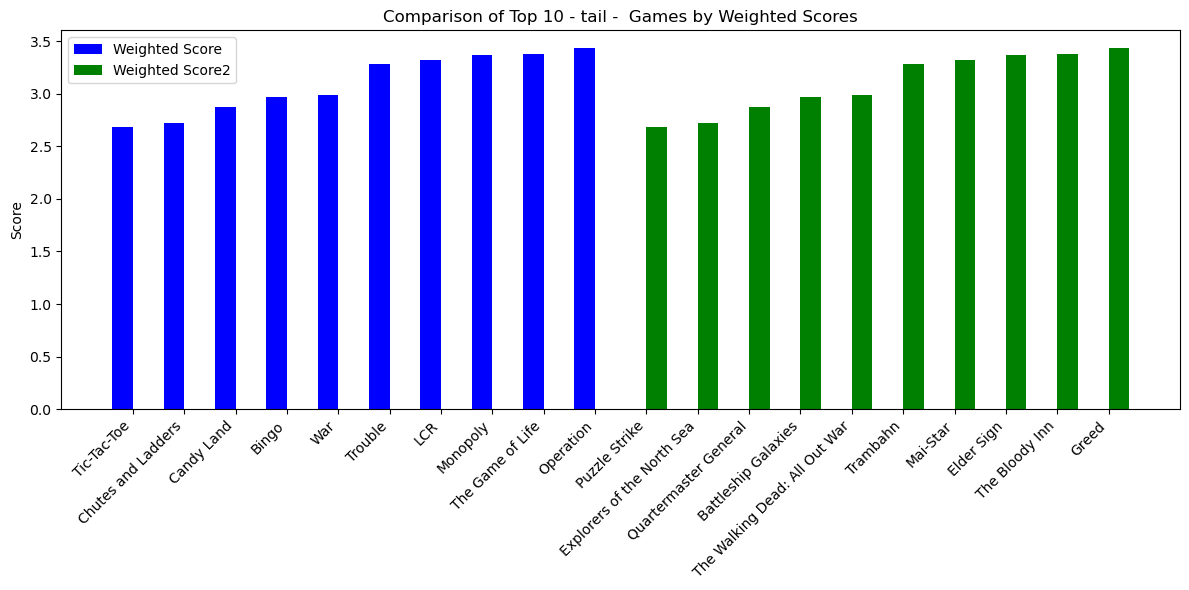

In [112]:
# Get the top 10 games for both rankings
top_10_weighted = data_df.nsmallest(10, "Weighted Score")
top_10_popularity = games_df.nsmallest(10, "Weighted Score2")

# Combine the two rankings for comparison
comparison_df = (
    top_10_weighted[["Name", "Weighted Score"]]
    .merge(top_10_popularity[["Name", "Weighted Score2"]], on="Name", how="outer")
)

# Bar chart for comparison
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(comparison_df))  # x-axis positions

bar_width = 0.4
ax.bar(x - bar_width / 2, comparison_df["Weighted Score"], width=bar_width, label="Weighted Score", color="blue")
ax.bar(x + bar_width / 2, comparison_df["Weighted Score2"], width=bar_width, label="Weighted Score2", color="green")

ax.set_xticks(x)
ax.set_xticklabels(comparison_df["Name"], rotation=45, ha="right")
ax.set_title("Comparison of Top 10 - tail -  Games by Weighted Scores")
ax.set_ylabel("Score")
ax.legend()

plt.tight_layout()
plt.show()


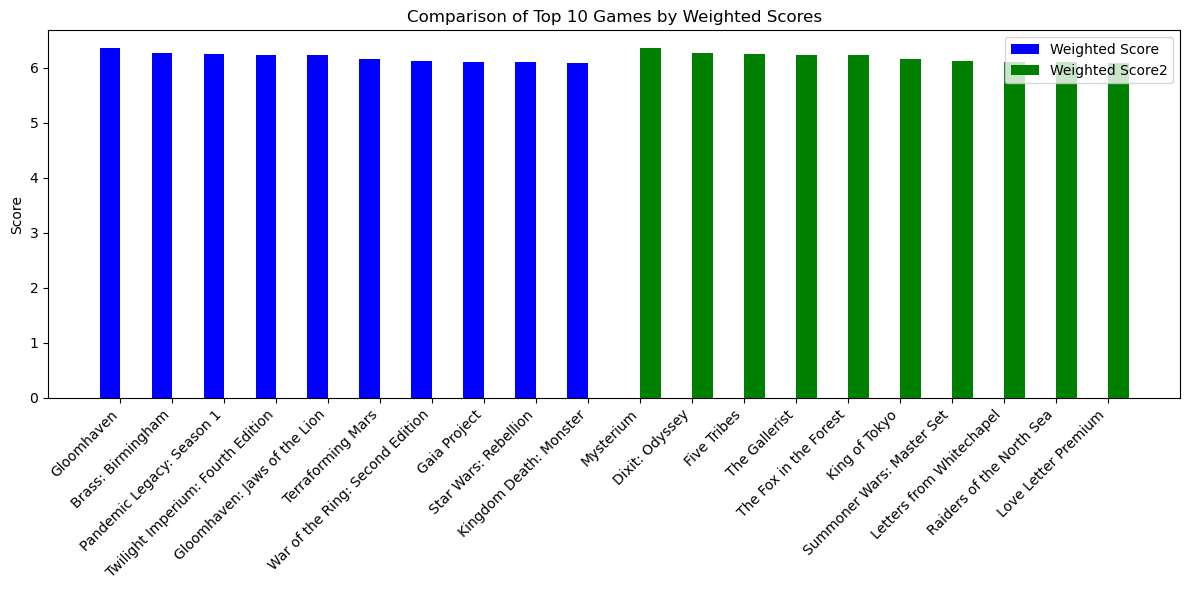

In [111]:
# Get the top 10 games for both rankings
top_10_weighted = data_df.nlargest(10, "Weighted Score")
top_10_popularity = games_df.nlargest(10, "Weighted Score2")

# Combine the two rankings for comparison
comparison_df = (
    top_10_weighted[["Name", "Weighted Score"]]
    .merge(top_10_popularity[["Name", "Weighted Score2"]], on="Name", how="outer")
)

# Bar chart for comparison
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(comparison_df))  # x-axis positions

bar_width = 0.4
ax.bar(x - bar_width / 2, comparison_df["Weighted Score"], width=bar_width, label="Weighted Score", color="blue")
ax.bar(x + bar_width / 2, comparison_df["Weighted Score2"], width=bar_width, label="Weighted Score2", color="green")

ax.set_xticks(x)
ax.set_xticklabels(comparison_df["Name"], rotation=45, ha="right")
ax.set_title("Comparison of Top 10 Games by Weighted Scores")
ax.set_ylabel("Score")
ax.legend()

plt.tight_layout()
plt.show()


Comparison of Strategies:

Blue Ranking:
Prioritizes highly-rated games with significant user engagement. This results in a list dominated by universally popular games that have a broad appeal.
Games with smaller user pools are less likely to rank highly, even if their ratings are excellent.

Green Ranking:
Balances between ratings and the number of users by considering both exponential decay and the popularity factor. This strategy allows games with smaller but dedicated followings to rank alongside universally acclaimed titles.
Games that might be overlooked in the blue ranking gain visibility here, as seen with titles like The Fox in the Forest and Love Letter Premium.


## Conclusion:

BGG Strategy: Best suited for highlighting games that are both critically acclaimed and widely popular, appealing to a broad audience.

Proposed 2 Strategies: More inclusive, showcasing a variety of games, including niche and mid-popularity titles. They offers a nuanced view of the dataset, balancing reliability and broader representation.

These rankings demonstrate the trade-offs between emphasizing widespread appeal versus ensuring smaller, highly rated games receive recognition. It is possible to understand what BGG website highlights in the games most and which users it targets.






